<img src="https://explore-datascience.net/images/images_admissions2/main-logo.jpg">

<a id="top"></a>
# Team JS2  Unsupervised Learning Predict Notebook
##### Members: Ntokozo Thumre, Rachel Mogopa, Matsatsi Mankga, Noluthando Kuhlane, Thanyani Gumani  <sup> </sup>
---
* [Notebook location]()
* [Trello board](https://trello.com/b/OaVKYCcn/unsupervisedlearningjs2)

 # Table of contents
1. [Introduction](#intro)
2. [Data collection and Cleaning](#data)
3. [Exploratory Data Analysis](#EDA)
4. [Model Building](#model)
5. [Submission](#submission)
6. [Conclusion](#conclusion)
7. [References](#references) 

<a id="intro"></a>
# 1. Introduction

The birth of the Motion Picture Camera in the late 18th century gave birth to possibly the most potent form of entertainment in existence: Cinema. Movies have managed to enthrall audiences ever since one second clips of racing horses emerged in the 1890s to the introduction of sound in the 1920s to the birth of color in the 1930s to mainstream 3D Movies in the early 2010s.

Cinema had humble origins in terms of plot, direction and acting (mainly due to its extremely short duration in its early days) but since then, movie industries around the world have been blessed with creative geniuses in the form of directors, screenwriters, actors, sound designers and cinematographers. It has also spread itself into a plethora of genres ranging from romance to comedy to science fiction to horror.

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.


## Comet

Comet is a great tool for version control as it records the parameters,experiments and conditions from each of the experiements- allowing for reproducing of results, or going back to a previous version of the experiment.


### Source
The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB


### Supplied Files
* genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
* genome_tags.csv - user assigned tags for genome-related scores
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edsa-movie-recommendation-challenge/sample_submission.csv
/kaggle/input/edsa-movie-recommendation-challenge/movies.csv
/kaggle/input/edsa-movie-recommendation-challenge/imdb_data.csv
/kaggle/input/edsa-movie-recommendation-challenge/genome_tags.csv
/kaggle/input/edsa-movie-recommendation-challenge/genome_scores.csv
/kaggle/input/edsa-movie-recommendation-challenge/train.csv
/kaggle/input/edsa-movie-recommendation-challenge/test.csv
/kaggle/input/edsa-movie-recommendation-challenge/tags.csv
/kaggle/input/edsa-movie-recommendation-challenge/links.csv


<a id="data"></a>
# 2. Data collection and Cleaning

## Installing packages
We will be working with the famous Surprise(Simple Python RecommendatIon System Engine.) Library, Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.

Below are all libraries that are used through out this notebook.

In [2]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud 

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne, KNNBaseline, KNNWithZScore, BaselineOnly
from surprise import CoClustering, NormalPredictor
from surprise import accuracy
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics.pairwise import linear_kernel
init_notebook_mode(connected=True)
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display_html 
from IPython.core.display import HTML
from collections import defaultdict
import datetime
import re
import squarify
import os

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

## Reading in data

Load all the dataframes that we desire to work with.

In [3]:
df_sample_submission = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/sample_submission.csv')
df_movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/movies.csv')
df_imdb = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/imdb_data.csv')
df_genome_scores = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_scores.csv')
df_genome_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_tags.csv')
df_train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/train.csv')
df_test = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/test.csv')
df_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/tags.csv')
df_links = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/links.csv')


In [4]:
# storing this mergered data for later use
metadata = pd.merge(df_movies, df_imdb, how = 'left', on = 'movieId')

### Finding duplicates from our datasets

At times our dataset may entail some duplicated values which are not necessary therefore this values must be removed, before removing these duplicates we are able to first check if we do have them. 

#### Duplicates on the df_imdb dataset

In [5]:
# Checking for duplicated rows in the dataset
duplicated_imdb_data = df_imdb[df_imdb.duplicated(keep=False)]
duplicated_imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords


There are no duplicates from the imdb_data dataset.

#### Duplicates on the movies dataset

In [6]:
# checking for duplicated rows in the dataset
duplicated_movies = df_movies[df_movies.duplicated(keep=False)]
duplicated_movies.head()

,movieId,title,genres


There are no duplicates in the df_movies dataset.

#### Duplicates on the test dataset

In [7]:
# checking for duplicated rows in the dataset
duplicated_test = df_test[df_test.duplicated(keep=False)]
duplicated_test.head()

,userId,movieId


There are no duplicates from the df_test dataset.

#### Duplicates on the train dataset

In [8]:
# checking for duplicated rows in the dataset
duplicated_train = df_train[df_train.duplicated(keep=False)]
duplicated_train.head()

,userId,movieId,rating,timestamp


There are no duplicates from the df_train dataset

## Data Preprocessing

Preparing the raw data before using it is a very crucial step for creating a machine learning model. This helps us to ensure that our data is suitable for our machine learning models.
Here we also take a glimpse of our datasets.

In [9]:
#A function that displays multiple dataframes in one cell
def data_overview_display(dataframe_list,column_names=[]):
    """A function that will enable us to view our dataframes on one cell when we apply it"""
    html_string = ''
    html_string += ('<tr>' + ''.join(f'<td style="text-align:center">{name}</td>' for name in column_names) + '</tr>')
    html_string += ('<tr>' + ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>' for df in dataframe_list) + '</tr>')
    html_string = f'<table>{html_string}</table>'
    html_string = html_string.replace('table','table style="display:inline"')
    display_html(html_string, raw=True)

In [10]:
#Show "imdb_df" dataframe
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [11]:
#displays the overview of train,test,movies 
data_overview_display([df_train.head(),df_test.head(),df_links.head(),df_tags.head()], column_names=['Train','Test','Links','Tags'])

Train Test Links Tags 
 
 
 
 userId 
 movieId 
 rating 
 timestamp 
 
 
 
 
 0 
 5163 
 57669 
 4.0 
 1518349992 
 
 
 1 
 106343 
 5 
 4.5 
 1206238739 
 
 
 2 
 146790 
 5459 
 5.0 
 1076215539 
 
 
 3 
 106362 
 32296 
 2.0 
 1423042565 
 
 
 4 
 9041 
 366 
 3.0 
 833375837 
 
 
 
 
 
 
 userId 
 movieId 
 
 
 
 
 0 
 1 
 2011 
 
 
 1 
 1 
 4144 
 
 
 2 
 1 
 5767 
 
 
 3 
 1 
 6711 
 
 
 4 
 1 
 7318 
 
 
 
 
 
 
 movieId 
 imdbId 
 tmdbId 
 
 
 
 
 0 
 1 
 114709 
 862.0 
 
 
 1 
 2 
 113497 
 8844.0 
 
 
 2 
 3 
 113228 
 15602.0 
 
 
 3 
 4 
 114885 
 31357.0 
 
 
 4 
 5 
 113041 
 11862.0 
 
 
 
 
 
 
 userId 
 movieId 
 tag 
 timestamp 
 
 
 
 
 0 
 3 
 260 
 classic 
 1439472355 
 
 
 1 
 3 
 260 
 sci-fi 
 1439472256 
 
 
 2 
 4 
 1732 
 dark comedy 
 1573943598 
 
 
 3 
 4 
 1732 
 great dialogue 
 1573943604 
 
 
 4 
 4 
 7569 
 so bad it's good 
 1573943455

In [12]:
#Displays the overview of Movies,Genome tags, and genome scores dataframes
data_overview_display([df_movies.head(),df_genome_tags.head(),df_genome_scores.head()], column_names=['Movies','Genome Tags','Genome Scores'])

Movies Genome Tags Genome Scores 
 
 
 
 movieId 
 title 
 genres 
 
 
 
 
 0 
 1 
 Toy Story (1995) 
 Adventure|Animation|Children|Comedy|Fantasy 
 
 
 1 
 2 
 Jumanji (1995) 
 Adventure|Children|Fantasy 
 
 
 2 
 3 
 Grumpier Old Men (1995) 
 Comedy|Romance 
 
 
 3 
 4 
 Waiting to Exhale (1995) 
 Comedy|Drama|Romance 
 
 
 4 
 5 
 Father of the Bride Part II (1995) 
 Comedy 
 
 
 
 
 
 
 tagId 
 tag 
 
 
 
 
 0 
 1 
 007 
 
 
 1 
 2 
 007 (series) 
 
 
 2 
 3 
 18th century 
 
 
 3 
 4 
 1920s 
 
 
 4 
 5 
 1930s 
 
 
 
 
 
 
 movieId 
 tagId 
 relevance 
 
 
 
 
 0 
 1 
 1 
 0.02875 
 
 
 1 
 1 
 2 
 0.02375 
 
 
 2 
 1 
 3 
 0.06250 
 
 
 3 
 1 
 4 
 0.07575 
 
 
 4 
 1 
 5 
 0.14075

## Data Cleaning

We check for nulls in our datasets and decide on what to do with columns with have nulls.

In [13]:
#Create the null-value dataframes of all the given data
train_null = pd.DataFrame({"Null Values":df_train.isnull().sum()})
test_null = pd.DataFrame({"Null Values":df_test.isnull().sum()})
movies_null = pd.DataFrame({"Null Values":df_movies.isnull().sum()})
links_null = pd.DataFrame({"Null Values":df_links.isnull().sum()})
imdb_null = pd.DataFrame({"Null Values":df_imdb.isnull().sum()})
tags_null = pd.DataFrame({"Null Values":df_tags.isnull().sum()})
genome_tags_null = pd.DataFrame({"Null Values":df_genome_tags.isnull().sum()})
genome_scores_null = pd.DataFrame({"Null Values":df_genome_scores.isnull().sum()})

In [14]:
#Display overview of null values of dataframes
data_overview_display([train_null,test_null,movies_null,links_null,genome_scores_null,tags_null,genome_tags_null], column_names=['df Train','df Test','df Movies', 'df Links','df genome scores','df tags','genome tags'])

df Train df Test df Movies df Links df genome scores df tags genome tags 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 rating 
 0 
 
 
 timestamp 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 title 
 0 
 
 
 genres 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 imdbId 
 0 
 
 
 tmdbId 
 107 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 tagId 
 0 
 
 
 relevance 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 tag 
 16 
 
 
 timestamp 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 tagId 
 0 
 
 
 tag 
 0

We can see that only the df_links and df_tags have null values from the tmdId the df_links has 107 null values while the tag column from the df_tags is missing about 16 values these values are so less that we can even drop them and won't lose any information. 

In [15]:
#Display overview null value of "df_imdb"
data_overview_display([imdb_null], column_names=['df imdb'])


df imdb 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 title_cast 
 10068 
 
 
 director 
 9874 
 
 
 runtime 
 12089 
 
 
 budget 
 19372 
 
 
 plot_keywords 
 11078

* The df_train dataset has no missing values.
* The df_imdb dataset is missing 71.02% of the budget column. We can not replace the missing values by the mean since a lot of data is missing. For this reason, we drop the budget column.
* The director column is missing 36.20%. We can not replace the rows missing directors because we cannot impute directors.
* The plot_keywords which is missing about 40.61% of the data.
* The runtime is missing about 44.32% of the data. 
* The title_cast column is missing about 36.91% of the data most columns can't be imputed reliably. and we can't use the budget column as one of our features since it is missing a lot of values, thus it is advisable to drop the budget column.

## Data Normalisation and Combination

In [16]:
df_movies['release_year']=df_movies['title'].str[-5:-1] #extracting released year
df_movies['genres']=df_movies['genres'].str.split('|') #spliting the genres into a list
df_movies=pd.concat([df_movies,df_train['rating']],axis=1).dropna() #concatinate ratings with movies dataframe
df_movies.head()

,movieId,title,genres,release_year,rating
0,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.0
1,2.0,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,4.5
2,3.0,Grumpier Old Men (1995),"[Comedy, Romance]",1995,5.0
3,4.0,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,2.0
4,5.0,Father of the Bride Part II (1995),[Comedy],1995,3.0


In [17]:
# Spliting the title cast into a list
df_imdb['title_cast']=df_imdb['title_cast'].str.split('|') 

# Spliting the Key words into a list
df_imdb['plot_keywords']=df_imdb['plot_keywords'].str.split('|') 

# Viewing the data
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


In [18]:
df_movies.shape

(62423, 5)

This shows that the df_movies dataframe has 62423 features(movies) and five columns

In [19]:
df_movies.head()

,movieId,title,genres,release_year,rating
0,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.0
1,2.0,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,4.5
2,3.0,Grumpier Old Men (1995),"[Comedy, Romance]",1995,5.0
3,4.0,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,2.0
4,5.0,Father of the Bride Part II (1995),[Comedy],1995,3.0


The df_movies dataframe has the following:
* movieId of the movie 
* title of the movie 
* genre(s) which the movie might fall into 
* year which the movie was released 
* ratings which are given by users for each given movie

In [20]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62423 entries, 0 to 62422
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       62423 non-null  float64
 1   title         62423 non-null  object 
 2   genres        62423 non-null  object 
 3   release_year  62423 non-null  object 
 4   rating        62423 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.9+ MB


The df-movies dataframe columns are of type float64 for movieId and ratings. The columns title, genres and the release_year are  of type objects.

In [21]:
df_sample_submission.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [22]:
df_imdb.shape

(27278, 6)

The df_imdb has 27278 rows and 6 columns 

In [23]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


From the dataframe df_imdb we have 4 columns of type object which are title_cast, director, budget and plot_keywords. The movieID column is of type int64 and the runtime column is of type float64.

In [24]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


### Counting the ratings of each movie

In [26]:
# Average ratings of each movie
df2 = pd.DataFrame(df_movies.groupby('title')['rating'].mean()).reset_index()

In [27]:
# viewing the first five rows of the dataframe df2
df2.head()

,title,rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",5.0
1,"""Great Performances"" Cats (1998)",5.0
2,#1 Cheerleader Camp (2010),4.0
3,#Captured (2017),2.5
4,#Female Pleasure (2018),4.0


* title : Title of movies.
* rating : Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

<a id="EDA"></a>
## 3. Exploratory Data Analysis
The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events and find interesting relations among the variables.

In [28]:
def extract_popular_movies(df1,df2):

    """
    A function that retruns popular movies based on 
    the avarage ratings and the total ratings count.

    Parameters:

    df1: DataFrame from the train_df
    df2: DataFrame from the movies_df

    Returns a dataframe of porpular movies.

    """


    rating = pd.DataFrame(df1.groupby('movieId')['rating'].mean())#Calculating avarage rating and storing the results as a DataFrame

    rating['ratings_count'] = pd.DataFrame(df1.groupby('movieId')['rating'].count())#Calculating total ratings count and storing the results as a DataFrame
    rating=rating.sort_values(by=['ratings_count','ratings_count'],ascending=False).reset_index()


    inner_join = pd.merge(rating,df2,on ='movieId',how ='inner')#Joining both DataFrames
    popular_movies=inner_join[['title','rating_x','ratings_count','release_year']].rename(columns={"rating_x": "rating"})

    return popular_movies

In [29]:
extract_popular_movies(df_train,df_movies).head() #display the extracted porpular movies

,title,rating,ratings_count,release_year
0,"Shawshank Redemption, The (1994)",4.417624,32831,1994
1,Forrest Gump (1994),4.047216,32383,1994
2,Pulp Fiction (1994),4.195097,31697,1994
3,"Silence of the Lambs, The (1991)",4.144172,29444,1991
4,"Matrix, The (1999)",4.154253,29014,1999


* title : Title of movies.
* rating : Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
* ratings_count: Total number of ratings per movies.
* release_year: Year which the movie has been released.

### Most common Genres

The genres variable will surely be important while building the recommendation engines since it describes the content of the film (i.e. Animation, Horror, Sci-Fi). A basic assumption is that films in the same genre should have similar contents.

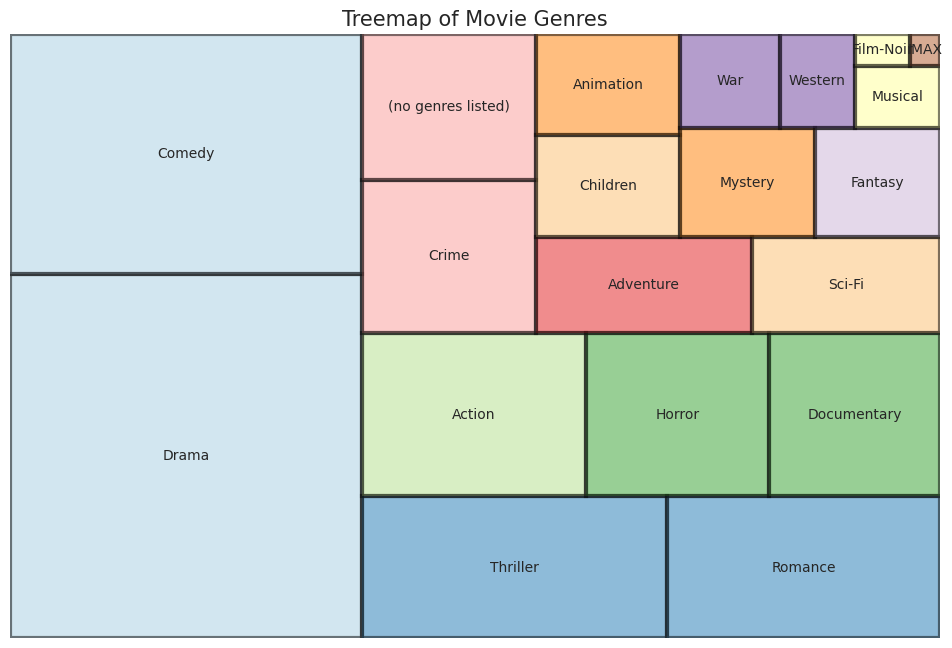

In [30]:
#Create dataframe "mini_df"
mini_df = df_movies['genres'].explode().value_counts().reset_index()

#Plotting popular genres using Treemap
sizes=np.array(mini_df['genres'])
labels=mini_df['index']
colors = [plt.cm.Paired(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':10})
plt.title('Treemap of Movie Genres', fontsize = 15)
plt.axis('off')
plt.show()

Insights on movie genres.

The dominance of drama as a genre is not surprising when we consider the following:

* Drama is the cheapest genre to produce as movies don’t necessarily require special sets, costumes, locations, props, special/visual effects, etc.
* Drama has the broadest definition of all genres – everything that happens anywhere ever is a drama. Conversely, other genres have a higher bar for classification, such as the need for high-octane events for a movie to be classed as Action, scary events to be Horror, funny elements to be a Comedy, etc.

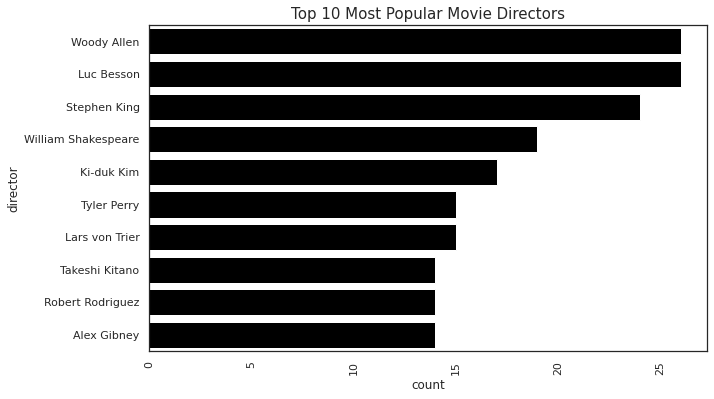

In [31]:
#Plotting top 10 movie directors using a count-plot
plt.figure(figsize = (10,6))
director=df_imdb['director']#.explode()
axes=sns.countplot(y=director, order = director.value_counts().index[1:11],color='black')
axes.set_title('Top 10 Most Popular Movie Directors',fontsize=15)
plt.xticks(rotation=90)
plt.show()

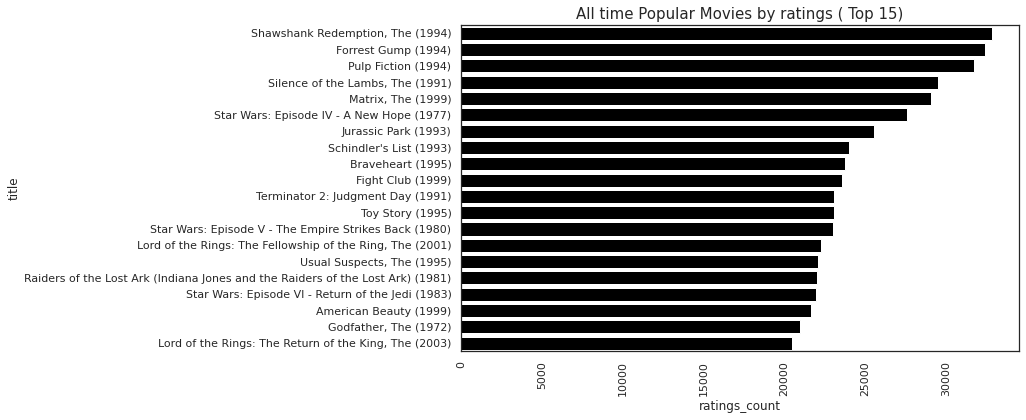

In [32]:
df=extract_popular_movies(df_train,df_movies)


plt.figure(figsize = (10,6))#Bar plot of most popular movies by ratings
ax=sns.barplot(y='title', x='ratings_count', data=df.head(20),color='black')
ax.set_title('All time Popular Movies by ratings ( Top 15)',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Insights for the all time most rated movies:


* The Shawshank Redemption(1994)

Is a hollywood classic. It is a simple movie with a deep and everlasting message.  Not only do the performance of Freeman and Robbins rank among the best of all time, but Shawshank is filled with brilliantly realised supporting characters who surprise and enthrall in equal measures.  Tim Robbins and Morgan Freeman have given an outstanding performance which inhance the overall impact of the movie. Meanwhile, Pulp Fiction and The Shawshank Redemption each received seven awards.

* Forrest Gump(1994)

A timeless classic and it is deservedly so. It is the perfect movie to watch when you're in the mood for a little soul-searching.  The story about one man's incredible and unexpected life journey is as significant now as it was when the film was first released in 1994. This movie is superbly acted, has great themes, some hilarious humor, a well written and interesting story, beautiful music by Alan Silvestri, a fantastic late twentieth century themed soundtrack and meaningful characters.  The movie won the best picture Oscar, earned 677 million  dollars around the world and is hailed by many as a modern classic filled with homespun catchphrases like "My momma always said life was like a box of chocolates. you never know what you're gonna get".

* Pulp Fiction(1994)

A 1994 American neo-noir black comedy crime film written and directed by Quentin Tarantino. Its plot jumps back and forth in time;  the  film's meandering conversations and hyper-stylized violence all felt new when the film hit theatres 27 years ago. It is considered a great movie because it was something that the audience had never seen before.  The dialogues were realistic, how people used to talk  in daily life, with a good mix of craziness involved in them.  Pulp Fiction is, in a specific way the Star Wars of the '90s.

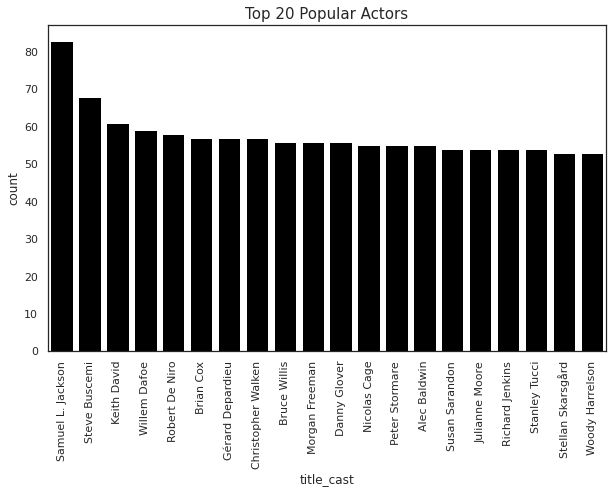

In [33]:
#Plotting popular cast using a count-plot
plt.figure(figsize = (10,6))
title_cast=df_imdb['title_cast'].explode()
ax=sns.countplot(x=title_cast, order = title_cast.value_counts().index[:20],color='black')
ax.set_title('Top 20 Popular Actors',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Insights for the cast:

* Samuel Leroy Jackson is an American actor and producer. Widely regarded as one of the most popular actors of his generation, the films in which he has appeared have collectively grossed over $27 billion worldwide, making him the highest-grossing actor of all time.
Movies featured in: 
1.	Jurassic Park(1993) as Ray Arnold
2.	Goodfellas(1990) as “Stacks” Edwards

* Steven Vincent Buscemi is an American actor, director, producer, writer, and former firefighter.
Movies featured in: 
1.	FARGO(1996) as Carl Showalter
2.	Ghost World(2001) as Seymour

* Keith David Williams is an American actor and producer who once served in the Military.
Movies featured in: 
1. Platoon(1986) as King
2.	Pitch black as Abu 'Imam' al-Walid

* William James "Willem" Dafoe is an American actor. He is known for his distinctive gravelly voice, and has received multiple accolades, including nominations for four Academy Awards and three Golden Globe Awards.
Movies featured in: 
1. Spider-Man(2002) as Norman Osborn
2.	Pavilion of Women where he played an American priest living in China

* Nicolas Kim Coppola, known professionally as Nicolas Cage, is an American actor and filmmaker. Cage has been nominated for numerous major cinematic awards, and won an Academy Award, a Golden Globe, and Screen Actors Guild Award for his performance in Leaving Las Vegas.
Movies featured in: 
1.	Mom and Dad(2017) as Brent
2.	Shadow of the Vampire (2000) The film was produced by Nicolas Cage's Saturn Films


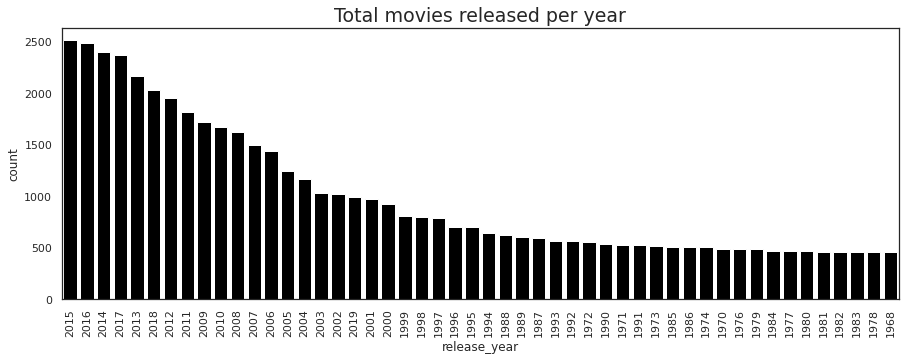

In [34]:
#Plotting total amount of movies released in each year using a count plot.
figure= plt.subplots(figsize=(15, 5))
axes=sns.countplot(x=df_movies['release_year'], order = df_movies['release_year'].value_counts()[0:50].index,color='black')
axes.set_title('Total movies released per year',fontsize=19)
plt.xticks(rotation=90)
plt.show()

It appears that 2015, 2016, 2014, 2017 and 2013 are the most popular years when it comes to movie releases in that order. In Hollywood circles, this is also known as the the dump years when sub par movies are released by the dozen.

Global film production is booming, thanks in large part to new technologies.  It’s cheaper and easier than ever before to shoot, edit and distribute a feature film, not to mention the effect of the internet in sharing ideas, knowledge and advice.
It’s not possible to give a definitive figure for the exact number of films made each year but the growth can be seen from the graph above.

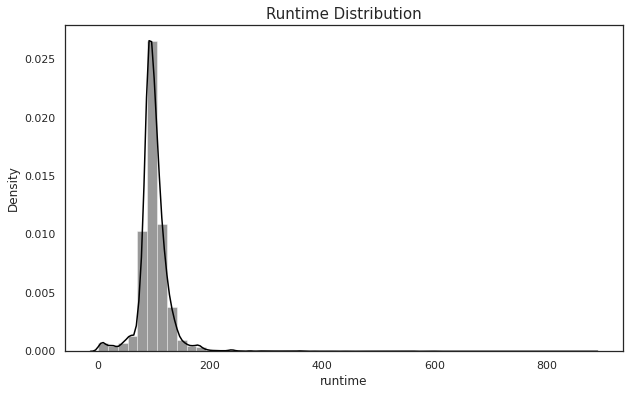

In [35]:
#Plotting distribution of movies's duration using dist-plot
plt.figure(figsize = (10,6))
axes=sns.distplot(df_imdb['runtime'],color='black')
axes.set_title('Runtime Distribution',fontsize=15)
plt.show()

### Title Wordcloud

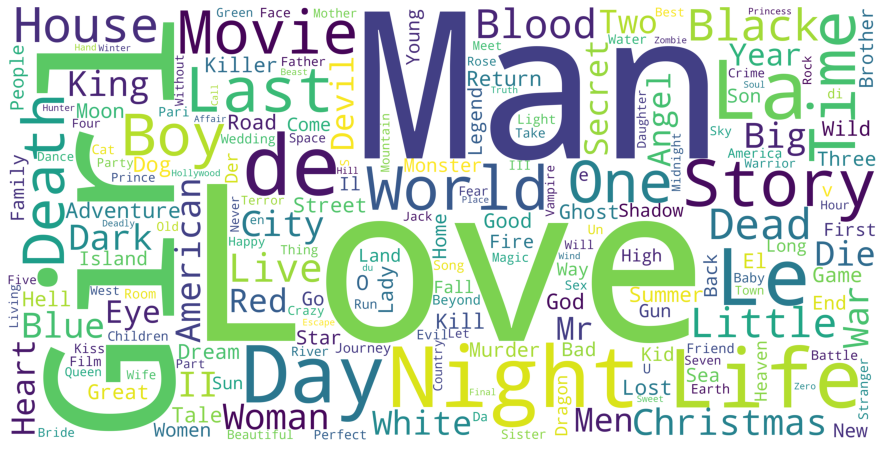

In [36]:
# Creating a wordcloud of the movie titles to view the most popular movie titles withtin the word cloud
df_movies['title'] = df_movies['title'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plotting the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

The word Love is the most commonly used word in movie titles. Girl, Boy, Woman and Man are also among the most commonly occuring words. I think this encapsulates the idea of the  presence of romance in movies pretty well.

In [37]:
# Merging the imdb_df and movies_df
movies_imdb= pd.merge(df_imdb,df_movies,on ='movieId',how ='inner')

In [38]:
movies_imdb.isnull().sum()

movieId              0
title_cast        9665
director          9519
runtime          11345
budget           17583
plot_keywords    10482
title                0
genres               0
release_year         0
rating               0
dtype: int64

In [39]:
#Create variable "runtime_genre"
runtime_per_genre=movies_imdb[['genres','runtime']].explode('genres')


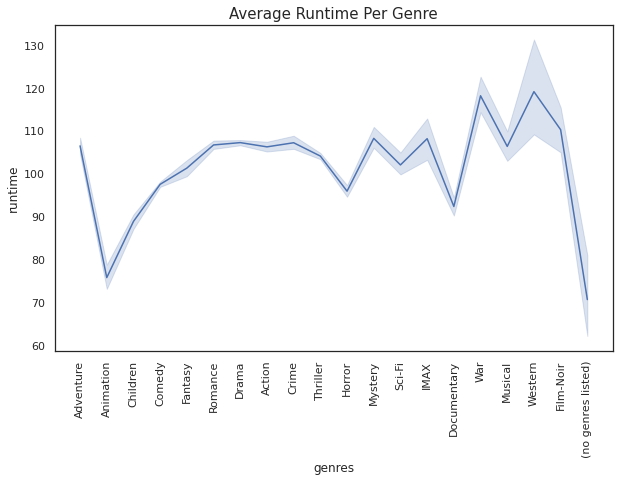

In [40]:
#Plotting an average runtime per genre using line-plot
plt.figure(figsize=(10,6))
axes=sns.lineplot(x="genres", y="runtime", data=runtime_per_genre)
axes.set_title('Average Runtime Per Genre',fontsize=15)
plt.xticks(rotation=90)
plt.show()

The plot is showing movies average runtime per genre. 
We can interpret that movies in the genres War and Westem have higher average runtime compared to other genres. Animation and documentary movies have the least average runtime in mins.
The movie's average runtime lies between 50 to 100 mins.

## Analysis on the ratings

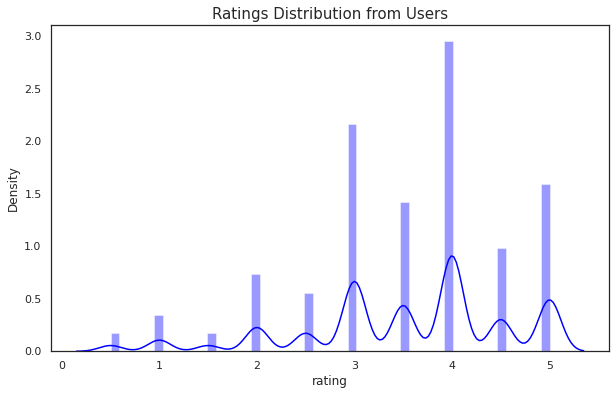

In [41]:
#Plotting Ratings distribution of observations using a dist-plot
plt.figure(figsize = (10,6))
axes=sns.distplot(df_movies['rating'],color='blue')
axes.set_title('Ratings Distribution from Users',fontsize=15)
plt.show()


The ratings seems to be following a normal distribution  with a mean of only 3.533395 and a median of 3.500000 and a mode of 4.000 but maximum values reaching as high as 5, which is almost 2 times greater than the mean. However, as can be seen from the distribution plot, almost all movies have a ratings score less than 5 (the 75th percentile is at 4.000000).

It appears that Users are extremely generous in their ratings. The mean rating is only a 3.533395 on a scale of 5. Half the movies have a rating of greater than or equal to 3.0.

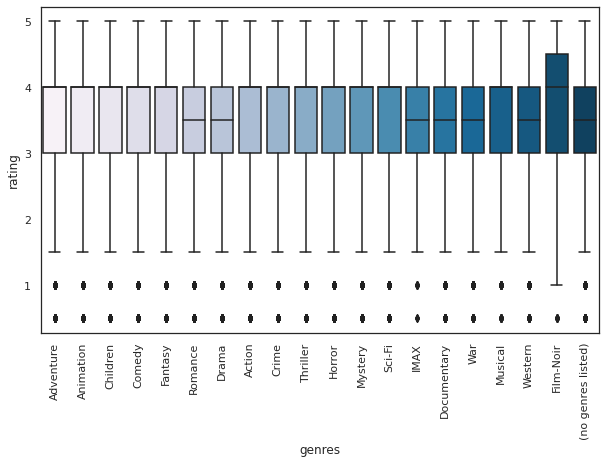

In [42]:
#Plotting the average rating per genre using a box-plot
plt.figure(figsize=(10,6))
genre_rating=df_movies[['rating','genres']].explode('genres')
sns.boxplot(x="genres", y="rating", data=genre_rating,palette="PuBu")
plt.xticks(rotation=90)
plt.show()

In [43]:
#Create the dataframe "df"
df=extract_popular_movies(df_train,df_movies)

#Extracting latest movies from 2010 to date
latest_movies=df[df['release_year']>'2010'][['rating','ratings_count','title']]

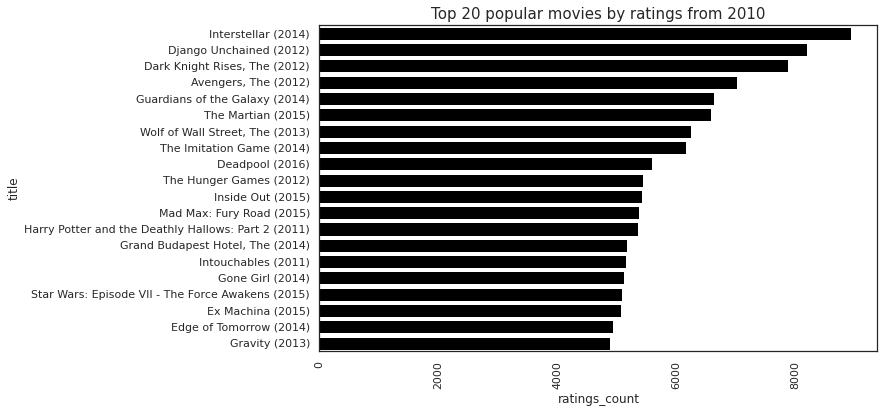

In [44]:
#Plotting the latest movies from 2010 to date using a bar-plot
plt.figure(figsize = (10,6))
axes=sns.barplot(y='title', x='ratings_count', data=latest_movies.head(20),color='black')
axes.set_title('Top 20 popular movies by ratings from 2010',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Insights on the latest movies:
* Interstellar(2014) & The Dark Knight Rises (2012).

We see that two Christopher Nolan Films, The Dark Knight(3) and Interstellar(1) occur at the very top of our chart. The chart also indicates a strong bias from  Users towards particular genres and directors. Interstellar is a 2014 epic science fiction film and The Dark Knight Rises is a 2012 superhero film Based on the DC Comics character Batman, it is the final installment in Nolan's The Dark Knight Trilogy, and the sequel to The Dark Knight (2008) the anticipation of this movie could have made it be one of the highly rated movies

* Django Unchained(2012)

Django Unchained(2) is a 2012 American revisionist Western film written and directed by Quentin Tarantino, starring Jamie Foxx, Christoph Waltz, Leonardo DiCaprio, Kerry Washington, and Samuel L. Jackson, Users could have rated this movie because it shows how black Americans used to be treated back in the days and it features some of the popular figures like Leonardo DiCaprio, Jamie Foxx, Samuel L. Jackson and it is directed by one of the famous directors.

* The Avengers(2012) & Guardians of the Galaxy(2014)

Marvel's The Avengers(4) (classified under the name Marvel Avengers Assemble in the United Kingdom and Ireland), is a 2012 American superhero film based on the Marvel Comics superhero team of the same name. Produced by Marvel Studios and distributed by Walt Disney Studios Motion Pictures, it is the sixth film in the Marvel Cinematic Universe (MCU) and Guardians of the Galaxy(5) is the tenth film from the Marvel which is all about a team of space heroes known as the "Guardians of the Galaxy" who were created to save the galaxy and it is part of the Avengers sequel.

### Title_cast Wordcloud

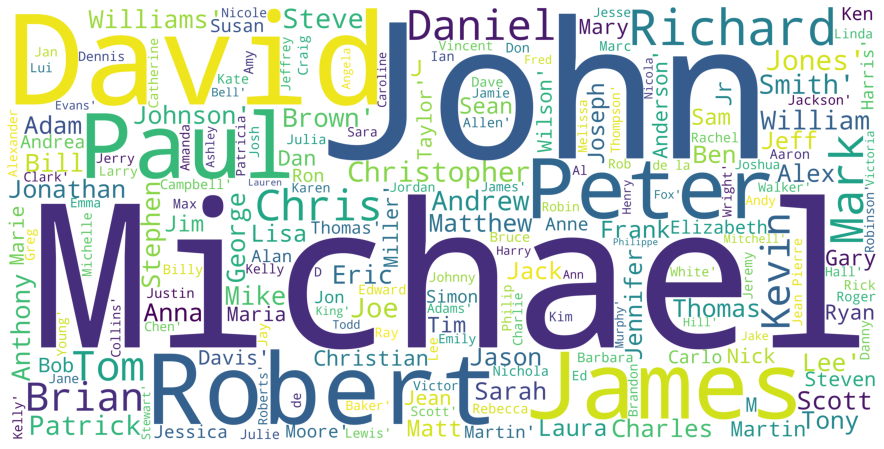

In [45]:
# Creating a wordcloud of the movie titles to view the most popular movie titles withtin the word cloud
df_imdb['title_cast'] = df_imdb['title_cast'].fillna("").astype('str')
title_corpus = ' '.join(df_imdb['title_cast'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plotting the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

We can see that a lot of our movies we didn't know the cast as we can see the word 'Unknown cast'and we imputed those unknown cast for movies with that string let's look at a wordcloud without the unknown cast string below for better observation on what we already have.

We can see the names of the cast such as Michael, David, Paul, James, John, Peter, Richard and Robert just to name a few these names had a large fontsize because they appeared a lot on the column meaning these actors must have been in most movies from our dataset.

## Data Prepartion

In [46]:
# Filling nans on the title_cast column with 'Unknown cast'
metadata['title_cast'].fillna('Unknown cast', inplace = True)

# Filling nans on the plot_keywords column with 'Unknown keywords'
metadata['plot_keywords'].fillna('Unknown keywords', inplace = True)

# Filling nans on the director column with 'Unknown director'
metadata['director'].fillna('Unknown director', inplace = True)

# Filling missing values with the average of the runtime
metadata['runtime'].fillna(round(metadata['runtime'].mean(),1), inplace = True)

# Every genre is separated by a | so we simply have to call the split function on | and separate them by ,
metadata['genres'] = metadata['genres'].str.split('|')

# Every title_cast is separated by a | so we simply have to call the split function on | and separate them by ,
metadata['title_cast'] = metadata['title_cast'].str.split('|')

# Every plot_keywords is separated by a | so we simply have to call the split function on | and separate them by ,
metadata['plot_keywords'] = metadata['plot_keywords'].str.split('|')

<a id="model"></a>
## 4. Model Building

## Content-based Filtering

**What Is Content-based Filtering?**

This filtering is based on the description or some data provided for that product. The system finds the similarity between recommended items based on their description or context. The user’s historical preference is taken into account to find products they may like in the future. For instance, if a user likes movies such as ‘Man in black’ then we can recommend him the movies of ‘Will Smith’ or movies with the genre ‘Sci-fi’.

**Techniques used for our content based filtering:**

We used CountVectoriser that is used in Feature Extraction which entirely is responsible for convecting text into vectors. and the reason why we chose to use count vectoriser instead of tfidVectoriser is to avoid penalising keywords, directors and genres that occurred more frequently essentially because if we have a high count in the dataset this doesn't mean that the word is less important.

**What is cosine similarity?**

Cosine similarity is a technique for measuring the similarity between vectors. It calculates the cosine of the angle between the two vectors. If the angle between the two vectors is zero, the similarity is calculated as 1 because the cosine of zero is 1. So the two vectors are the same. The cosine of any angle varies from 0 to 1. Therefore, similarity rates will vary from 0 to 1.

These are **steps we follow in the preparation of the genres and credits data**:
Strip Spaces and Convert to Lowercase from all our features. This way, our engine will not confuse between Johnny Depp and Johnny Galecki. Mention Director 3 times to give it more weight relative to the entire cast.

In [47]:
#### Preparing a new column for our cosine similarity
def string_function(x):
    """merges name and surname into one name"""
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [48]:
# defining our features 
features = ['title_cast','director','plot_keywords','genres']

# A loop that will use the string_function to remove spaces present between words
for feature in features:
    metadata[feature] = metadata[feature].apply( string_function)

In [50]:

# A function that joins the words from the columns title_cast, director, genres and plot_keywords 
def create_sentence(x):
    """  We will use this to creates a new column called sentence which is the combination of words from
    each column making the metadata dataframe and each entry from
    the sentence column is made of the columns: title_cast, director, genres and plot_keywords"""
    
    output = ' '.join(x['plot_keywords']) + ' ' + ' '.join(x['title_cast']) + ' ' + ' '.join(x['director']) + ' ' + ' '.join(x['genres'] ) + ' ' + ' '.join(x['director'])+ ' ' + ' '.join(x['director'])
    return output
metadata['sentence'] = metadata.apply(create_sentence, axis=1)

In [51]:
metadata.head()

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,sentence
0,1,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]","[tomhanks, timallen, donrickles, jimvarney, wa...",johnlasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgianimation]",toy rivalry cowboy cgianimation tomhanks timal...
1,2,Jumanji (1995),"[adventure, children, fantasy]","[robinwilliams, jonathanhyde, kirstendunst, br...",jonathanhensleigh,104.0,"$65,000,000","[boardgame, adventurer, fight, game]",boardgame adventurer fight game robinwilliams ...
2,3,Grumpier Old Men (1995),"[comedy, romance]","[waltermatthau, jacklemmon, sophialoren, ann-m...",markstevenjohnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]",boat lake neighbor rivalry waltermatthau jackl...
3,4,Waiting to Exhale (1995),"[comedy, drama, romance]","[whitneyhouston, angelabassett, lorettadevine,...",terrymcmillan,124.0,"$16,000,000","[blackamerican, husbandwiferelationship, betra...",blackamerican husbandwiferelationship betrayal...
4,5,Father of the Bride Part II (1995),[comedy],"[stevemartin, dianekeaton, martinshort, kimber...",alberthackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]",fatherhood doberman dog mansion stevemartin di...


In [52]:
# Create a vectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
vectorizer = tf.fit_transform(metadata['sentence'].head(5000))

In [53]:
# cosine similarity
cosine_sim = linear_kernel(vectorizer.toarray(),vectorizer.toarray())

In [54]:
def content_recommendations(movie_title):
    
    """
    Returns top 10 movie recommended movies based on movie title
    
    Parameter
    ---------
    movie_title(str): a string title of a movie.
    
    Return
    ------
    recommended_movies(str): list of recommeded movies.
    
    """
    # Build a 1-dimensional array with movie titles
    movie_index=pd.Series(df_movies.index,index=df_movies['title'])
    
    # Generate  similarities between the movie title and movie index based on genre
    similarities=list(enumerate(cosine_sim[movie_index[movie_title]]))
    
    # Generate the top 10 similarities
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[1:11]
    recommended_movies= df_movies['title'].iloc[[i[0] for i in similarities]]
    
    return recommended_movies

In [55]:
content_recommendations('Jumanji (1995)')

986                       Escape to Witch Mountain (1975)
1954            Darby O'Gill and the Little People (1959)
2003                                  Return to Oz (1985)
2071                        NeverEnding Story, The (1984)
2308                        Santa Claus: The Movie (1985)
898                              Wizard of Oz, The (1939)
1958                             Gnome-Mobile, The (1967)
3513    The Slipper and the Rose: The Story of Cindere...
2323                         Young Sherlock Holmes (1985)
994                          Swiss Family Robinson (1960)
Name: title, dtype: object

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who s/he is.

## Collaborative Filtering

**What Is Collaborative Filtering?**

Collaborative filtering is a technique that can filter out items that a user might like based on reactions by similar users.

It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

to be more precise it is based on similarity in preference, taste and choices of two users. A good example that we can give you could be if user A likes movies 1,2 and 3 and user B likes movies 2,3 and 4 then this implies that they have similar interests and user A should like movie 4 and B should like movie 1.

**Why Do We Consider Collaborating Filtering Over Content Based Filtering?**

Collaborative filtering recommender engine is a much better algorithm then content-based filtering since it can do feature learning on its own, in other words, it can learn which features to use.

**Collaborative filtering consist of two filtering techniques:**

Model-based Technique
Memory-based filtering

A short description of these techniques.
* Model-based Technique Model-based collaborative filtering algorithms provide item recommendations by first developing a model of user ratings. With these systems you will build a model from user ratings and then make recommendations based on that model, this offers a speed and scalability that not available when you are forced to refer back to the entire dataset to make a prediction.

* Memory based filtering Memory-based rely heavily on simple similarity measures (cosine similarity, Pearson correlation and more) to match similar people or items together. These consist of two methods namely Item-based and user based collaborative filtering.


In [56]:

#train_subset = df_train.copy()

#trainset, testset = train_test_split(data, test_size=.10, random_state=42)

# Limit training sample to 500 000 rows 
train_sample = df_train.sample(n =10000000,replace=False)

# Drop the timestamp column since it is not needed
data = train_sample.drop('timestamp', axis = 1)

# Define the Reader object by specifying the rating scale range in the dataset
reader = Reader(rating_scale=(0.5, 5), line_format='user item rating') 

# Load the dataset 
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

# Split dataset into train and validation sets
train_set, val_set = train_test_split(data, test_size=0.10, random_state=42)

### Single Value Decomposition(SVD)

SVD is decomposition of a matrix R which is the utility matrix with m equal to the number of users and m number exposed items (movies) into the product of three matrices:

U is a left singular orthogonal matrix, representing the relationship between users and latent factors Σ is a diagonal matrix (with positive real values) describing the strength of each latent factor

V(transpose) is a right singular orthogonal matrix, indicating the similarity between items and latent factors.

In [57]:
# Apply your modelling here
# Base algorithm
algo = SVD(n_epochs= 50, init_std_dev=0.02, n_factors=200)

# Fitting our trainset
algo.fit(train_set)
 
# Using the 15% testset to make predictions
predictions = algo.test(val_set) 
predictions

test = pd.DataFrame(predictions)

In [58]:
pred=pd.DataFrame(predictions)
pred

,uid,iid,r_ui,est,details
0,120611,2160,3.5,3.575123,{'was_impossible': False}
1,153169,30810,4.0,3.584306,{'was_impossible': False}
2,65348,86320,4.5,3.804216,{'was_impossible': False}
3,145213,2997,3.0,3.996054,{'was_impossible': False}
4,20424,5670,3.5,3.871720,{'was_impossible': False}
...,...,...,...,...,...
7995,41468,1876,5.0,2.626026,{'was_impossible': False}
7996,22864,89492,4.0,3.983888,{'was_impossible': False}
7997,99246,741,5.0,4.374984,{'was_impossible': False}
7998,88102,31878,5.0,3.970228,{'was_impossible': False}


In [59]:
pred=pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})#
pred.drop(['r_ui','details'],axis=1,inplace=True)


In [60]:
pred.head()

,userId,movieId,rating
0,120611,2160,3.575123
1,153169,30810,3.584306
2,65348,86320,3.804216
3,145213,2997,3.996054
4,20424,5670,3.871720


In [61]:
#from surprise import accuracy
svd_rmse=accuracy.rmse(predictions)

RMSE: 0.9647


### Non-Negative Matrix Factorization (NMF)

Non-negative matrix factorization (NMF or NNMF), also non-negative matrix approximationis a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to inspect. 

In [62]:
# Non-Negative Matrix Factorization model
nmf = NMF(random_state=0)

# Fitting the model
nmf.fit(train_set)

# Making prediction on the validation dataset
predictions_nmf = nmf.test(val_set)

# Evaluating model performance
nmf_rmse = accuracy.rmse(predictions_nmf)

RMSE: 1.1522


### CoClustering

In [63]:
# CoClustering model
coc= CoClustering(random_state=42)

# Fitting the model
coc.fit(train_set)

# Making prediction on the validation dataset
predictions_coc = coc.test(val_set)

# Evaluating model performance
coc_rmse = accuracy.rmse(predictions_coc)

RMSE: 1.1564


### NormalPredictor

In [64]:
# NormalPredictor model
np = NormalPredictor()

# Fitting the model
np.fit(train_set)

# Making prediction on the validation dataset
predictions_np = np.test(val_set)

# Evaluating model performance
np_rmse = accuracy.rmse(predictions_np)

RMSE: 1.4518


### BaselineOnly

In [65]:
# BaselineOnly model
bsl_options = {'method': 'sgd','n_epochs': 40}
blo = BaselineOnly(bsl_options=bsl_options)

# Fitting the model
blo.fit(train_set)

# Making prediction on the validation dataset
predictions_blo = blo.test(val_set)

# Evaluating model performance
blo_rsme = accuracy.rmse(predictions_blo,
                             verbose=True)

Estimating biases using sgd...
RMSE: 0.9636


### Singular Value Decomposition pp (SVDpp)

In [66]:
# Singular Value Decomposition pp (SVDpp)
svdpp = SVDpp(n_epochs=20,n_factors=400,init_std_dev=0.001,random_state=42, verbose=True)

# Fit to trainset
svdpp.fit(train_set)

# Make predictions on the validation dataset
predictions_svdpp = svdpp.test(val_set)

# Evaluating model performance
svdpp_rmse = accuracy.rmse(predictions_svdpp)

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
RMSE: 0.9639


## Using the Surprise Library

We will be using the dataset module which loads the pandas dataframe that is available for this experiment, The reader function is used to parse a file containing ratings data. The default format in which it accepts data is that each rating is stored in a separate line in the order user, movie and rating

In [67]:
# Here we use a powerful library -Surprise, designed for recommender systems to validate our model.
reader = Reader(rating_scale=(0.5, 5))

data = Dataset.load_from_df(pred[['userId', 'movieId' ,'rating']], reader)

cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)


{'test_rmse': array([0.37250219, 0.37276022, 0.3558962 ]),
 'fit_time': (1.4661898612976074, 1.415771722793579, 1.4661691188812256),
 'test_time': (0.01508021354675293,
  0.014621973037719727,
  0.014903545379638672)}

## Hyperparameter Tuning

In [68]:
# Define search grid
param_grid = {'n_epochs': [40, 45,50], 'init_std_dev' : [0.02,0.05], 'n_factors' : [200,250]}

# Instatiate gridsearch instance
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=2)

# Run gridsearch
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.38175884057791154
{'n_epochs': 50, 'init_std_dev': 0.02, 'n_factors': 200}


In [69]:
# We are converting the userId and movieId into integers as our algorithm converted them into floats so we can easily concatenate
pred.userId=pred['userId'].astype(str)
pred.movieId=pred['movieId'].astype(str)

In [70]:
pred['Id'] =  pred['userId'].astype(str).str.zfill(1) + '_' + pred['movieId'].astype(str).str.zfill(1)

In [71]:
predict=pred[['Id','rating']]

In [72]:
predict.head()

,Id,rating
0,120611_2160,3.575123
1,153169_30810,3.584306
2,65348_86320,3.804216
3,145213_2997,3.996054
4,20424_5670,3.871720


<a id="submission"></a>
## 5. Submission

In [ ]:
predict[['Id', 'rating']].to_csv('js2_sub.csv', index=False)

# Generate your outputs here

Preparing the Submission File

We make submissions in CSV files. The submissions usually have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for the data is the string 'Id'). The prediction column will use the name of the target field.

We will create a DataFrame with this data, and then use the dataframe's to_csv method to write our submission file. Explicitly include the argument index=False to prevent pandas from adding another column in our csv file.

In [ ]:
submission = pd.DataFrame({"Id":predict.Id, "rating":predict.rating})
submission.to_csv("SVD_tuned.csv", index=False)

In [ ]:
submission.head()

<a id="conclusion"></a>
## 6. Conclusion

In this notebook, we have built 2 different recommendation engines based on different ideas and algorithms. They are as follows:
* Content Based Recommender: We built two content based engines; one that took movie overview and taglines as input and the other which took metadata such as cast, crew, genre and keywords to come up with predictions. We also deviced a simple filter to give greater preference to movies with more votes and higher ratings.
* Collaborative Filtering: We used the powerful Surprise Library to build a collaborative filter based on single value decomposition. The RMSE obtained was less than 1 and the engine gave estimated ratings for a given user and movie.

We found that sparsity and scalability were a challenge when we attempted both user-based and item-based memory methods. We settled on the singular value decomposition(SVD), a collaborative filtering method that deals with the sparsity that we had with the user-user and item-item memory based methods, the advantage of being computationally more efficient than content based method .

The SVD model was able to predict new ratings with a RMSE score of 0.79264 on kaggle.


**Possible improvements:**

Collaborative filtering methods have an issue with the cold start problem, which the content based filtering method doesn’t. This problem can be addressed by implementing a hybrid recommender system that uses a combination of both content and collaborative filtering based methods.





![](https://www.toonpool.com/user/250/files/hybrid_20095.jpg)



<a id="references"></a>
## 7. Reference

Lungu, C. (2018). Building a recommender system. [online] Machine Learning Blog. Available at: http://www.clungu.com/Building-a-recommender-system

Cold start problem - http://www.yusp.com/blog/cold-start-problem-recommender-systems/ 32a. Frank Kane, Sundog Education

Towards datascience. 2018. Building and Testing Recommender Systems With Surprise, Step-By-Step. [ONLINE] Available at: https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b. [Accessed 13 December 2020].